# **2. Tendencias temporales**

In [1]:
#Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.insert(0, os.path.abspath("..")) 

#Formulas
from data_loader import load_pkl

#DataFrames
movieBasics= load_pkl("movie.basics.clean.pkl")
titleRating= load_pkl("title.ratings.clean.pkl")

In [2]:
#Creación DataFrames unidos

mov_rat= pd.merge(movieBasics, titleRating, on="tconst", how="inner")


-   ### **<u>¿Años con más lanzamientos?</u>**

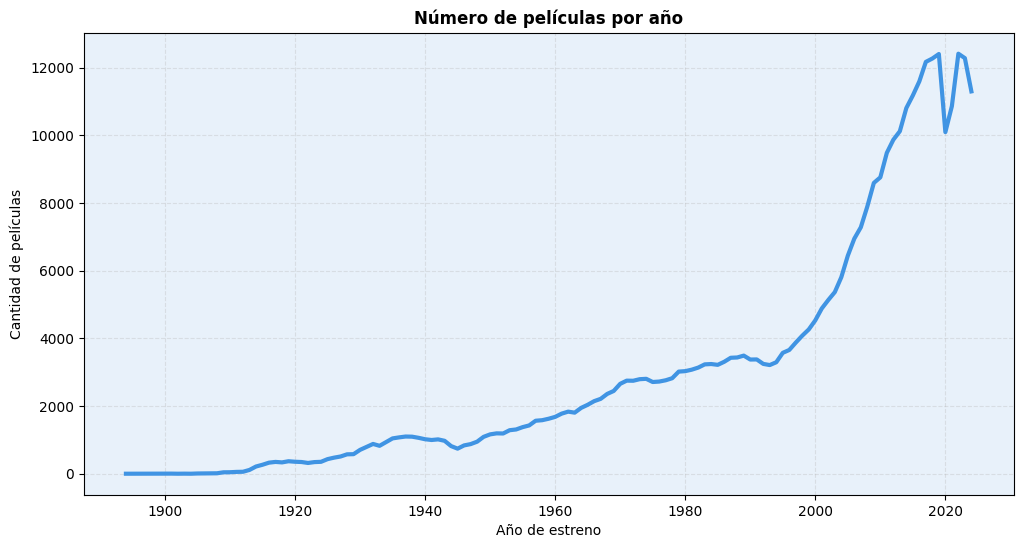

In [15]:
df= mov_rat.groupby("startYear").size().reset_index(name="count")
df = df[df["startYear"] != 2025]

plt.figure(figsize=(12,6))
plt.plot(df["startYear"], df["count"], linewidth=3, color="#4094E3")
plt.title("Número de películas por año", fontweight="bold")
plt.xlabel("Año de estreno")
plt.ylabel("Cantidad de películas")
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#E8F1FA")
plt.show()

En esta gráfica se ha eliminado el registro correspondiente a 2025, ya que al tratarse de un año en curso podría distorsionar la interpretación de la tendencia.  

Se observa un aumento sostenido en el número de películas producidas prácticamente cada año, con un crecimiento especialmente pronunciado desde la década de 1990 hasta alcanzar su pico en 2019. Este incremento puede atribuirse a factores como el abaratamiento de los costes de producción, la transición a formatos digitales, la globalización del mercado audiovisual y un mayor interés por parte del público y las productoras.

En 2020 se registra una caída abrupta, coincidiendo con la pandemia mundial de COVID-19, que detuvo gran parte de las producciones. Sin embargo, la actividad se recupera de forma notable en 2022.

**En conjunto, la tendencia refleja un mercado cinematográfico en expansión, con una producción anual creciente y sin señales claras de desaceleración en el futuro próximo.**

-   ### **<u>¿Han cambiado las valoraciones promedio a lo largo del tiempo?</u>**

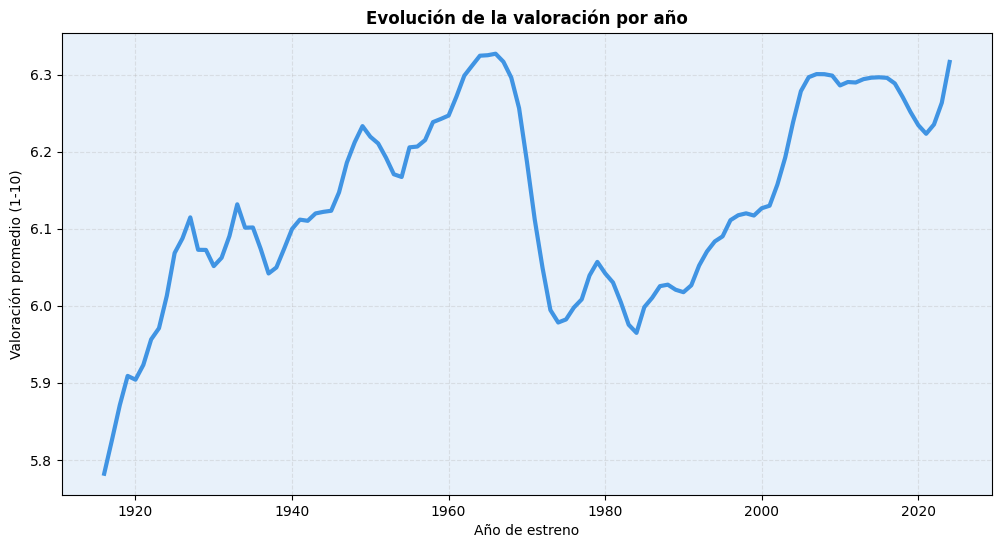

In [26]:
df= mov_rat.groupby("startYear")["averageRating"].mean().reset_index()
df= df[df["startYear"].between(1912, 2024)]
df["rolling_mean"] = df["averageRating"].rolling(window=5).mean()

plt.figure(figsize=(12,6))
plt.plot(df["startYear"], df["rolling_mean"], linewidth=3, color="#4094E3")
plt.title("Evolución de la valoración por año", fontweight="bold")
plt.xlabel("Año de estreno")
plt.ylabel("Valoración promedio (1-10)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#E8F1FA")
plt.show()

La valoración media de las películas ha mostrado cambios significativos a lo largo de las décadas. Desde 1910 hasta mediados de los años 60, se observa una tendencia claramente ascendente, alcanzando medias alrededor de 6,3. Esto podría explicarse porque los títulos que han sobrevivido a esa época suelen ser los mejores (las películas mediocres es más probable que hayan desaparecido) o debido a la alta valoración que recibían las producciones en un contexto con menos recursos y menos cantidad de títulos.

Posteriormente, entre los años 70 y 2000, se aprecia un descenso en la valoración media. Este fenómeno puede estar relacionado con el aumento notable en la producción de películas, lo que facilita la aparición de títulos de menor calidad, así como con la mayor facilidad de acceso a estas películas, incrementando la cantidad de votos y la diversidad de opiniones. Además, la incorporación de nuevos géneros y tendencias en la industria también pudo influir en esta bajada.

A partir del 2000, se observa un claro aumento en la nota media, excepto durante el año 2020, cuando la pandemia del COVID-19 afectó la producción cinematográfica y, por ende, la calidad promedio. Este repunte podría deberse a la mejora en la calidad de las producciones y al hecho de que los títulos recién estrenados tienden a generar valoraciones más extremas.

**En resumen, el mercado cinematográfico actual parece un buen momento para producir películas, dado el buen recibimiento promedio que están teniendo.**

-   ### **<u>¿Qué generos han ganado o perdido popularidad con los años?</u>**

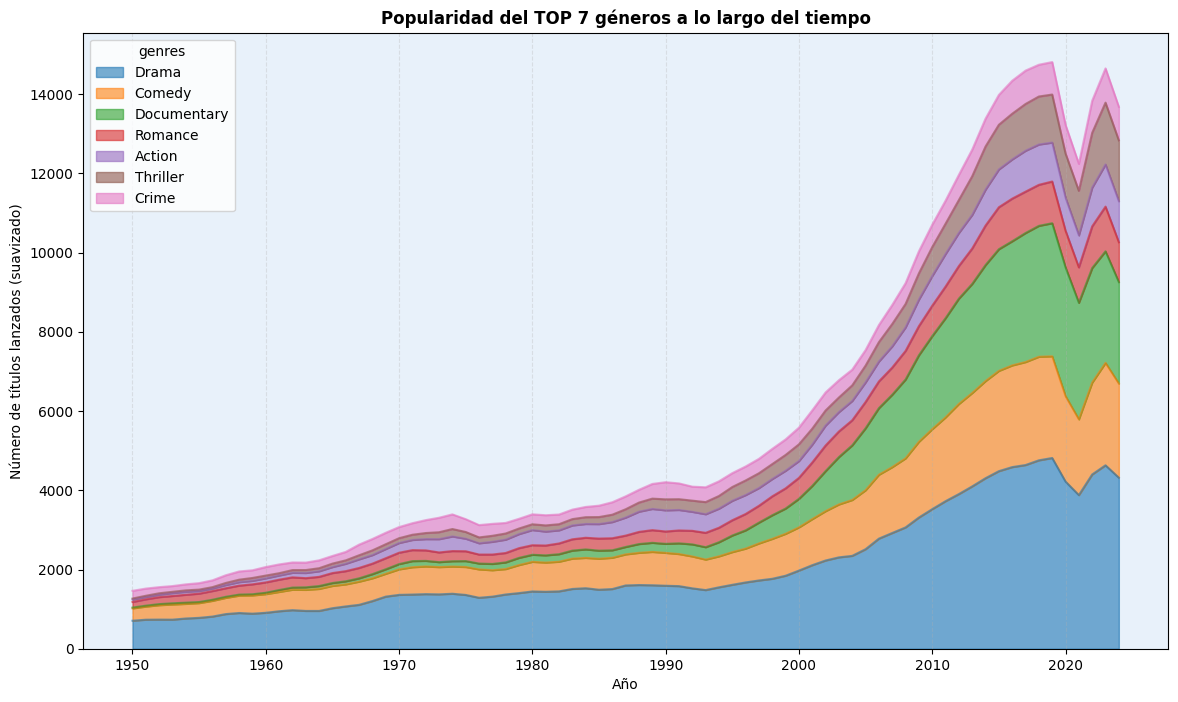

In [41]:
df= mov_rat.explode("genres")
df= df.groupby(["startYear", "genres"]).size().reset_index(name="num_titles")
df=df[df["startYear"].between(1950,2024)]
top_df= df.groupby("genres")["num_titles"].sum().sort_values(ascending=False).head(7).index

pivot = df.pivot(index="startYear", columns="genres", values="num_titles").fillna(0)
pivot_top = pivot[top_df]
pivot_top_smooth = pivot_top.rolling(window=2, min_periods=1).mean()
pivot_top_smooth.plot.area(figsize=(14,8), alpha=0.6)

plt.title("Popularidad del TOP 7 géneros a lo largo del tiempo", fontweight="bold")
plt.ylabel("Número de títulos lanzados (suavizado)")
plt.xlabel("Año")
plt.grid(True, axis= "x", linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#E8F1FA")
plt.show()


-   ### **<u>¿Ha cambiado la duración promedio con el tiempo?</u>**